# 『ガウス過程と機械学習』3章の図に関する実装

## 図3.1の実装
基底関数を動径基底関数
$$
\phi_h (x) = \exp{\{-\frac{(x-\mu_h)^2}{\sigma^2}\}}\ , \ (h = -H , \frac{1}{H} - H , ... , - \frac{1}{H}+H , H)
$$

としたときの回帰問題をサンプルとして提示します．


In [30]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [31]:
plt.style.available # スタイル確認

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [32]:
x = np.arange(-4 , 5 , 0.1 )
x

array([-4.00000000e+00, -3.90000000e+00, -3.80000000e+00, -3.70000000e+00,
       -3.60000000e+00, -3.50000000e+00, -3.40000000e+00, -3.30000000e+00,
       -3.20000000e+00, -3.10000000e+00, -3.00000000e+00, -2.90000000e+00,
       -2.80000000e+00, -2.70000000e+00, -2.60000000e+00, -2.50000000e+00,
       -2.40000000e+00, -2.30000000e+00, -2.20000000e+00, -2.10000000e+00,
       -2.00000000e+00, -1.90000000e+00, -1.80000000e+00, -1.70000000e+00,
       -1.60000000e+00, -1.50000000e+00, -1.40000000e+00, -1.30000000e+00,
       -1.20000000e+00, -1.10000000e+00, -1.00000000e+00, -9.00000000e-01,
       -8.00000000e-01, -7.00000000e-01, -6.00000000e-01, -5.00000000e-01,
       -4.00000000e-01, -3.00000000e-01, -2.00000000e-01, -1.00000000e-01,
        3.55271368e-15,  1.00000000e-01,  2.00000000e-01,  3.00000000e-01,
        4.00000000e-01,  5.00000000e-01,  6.00000000e-01,  7.00000000e-01,
        8.00000000e-01,  9.00000000e-01,  1.00000000e+00,  1.10000000e+00,
        1.20000000e+00,  

In [33]:
mu = np.arange(-3 , 5 , 1 )
mu

array([-3, -2, -1,  0,  1,  2,  3,  4])

In [34]:
sigma = 1

In [35]:
omega = np.array([-0.48 , -0.64 , 0.41 , 0.28 , 0.57 , 0.50 , -0.26 , 0.60])
omega

array([-0.48, -0.64,  0.41,  0.28,  0.57,  0.5 , -0.26,  0.6 ])

In [36]:
def radial_basis_function(x , mu_h , sigma):
    phi = np.exp(- (x - mu_h / sigma)**2)
    return phi

In [37]:
def radial_basis_function_vecteor(x , mu , sigma):# xとmuは同じ次元のベクトル
    phi_vector = []
    length = len(mu)
    # ベクトルの各要素に対して基底関数を計算
    for i in range(length) :
        phi_vector.append(radial_basis_function(x , mu[i] , sigma))
    return phi_vector

In [38]:
def regression_function(x , omega , mu , sigma):
    phi_vector = radial_basis_function_vecteor(x , mu , sigma)
    y = np.dot(omega , phi_vector)
    return y
x1 = np.arange(-2, 2, 0.05) # x1点として[-2, 2]まで0.05刻みでサンプル
x2 = np.arange(-2, 2, 0.05)  # x2点として[-2, 2]まで0.05刻みでサンプル
x1, x2 = np.meshgrid(x1, x2)  # 上述のサンプリング点(x1,x2)を使ったメッシュ生成


In [39]:
phi_vector = radial_basis_function_vecteor(x , mu , sigma)
phi_vector

[array([3.67879441e-01, 4.44858066e-01, 5.27292424e-01, 6.12626394e-01,
        6.97676326e-01, 7.78800783e-01, 8.52143789e-01, 9.13931185e-01,
        9.60789439e-01, 9.90049834e-01, 1.00000000e+00, 9.90049834e-01,
        9.60789439e-01, 9.13931185e-01, 8.52143789e-01, 7.78800783e-01,
        6.97676326e-01, 6.12626394e-01, 5.27292424e-01, 4.44858066e-01,
        3.67879441e-01, 2.98197279e-01, 2.36927759e-01, 1.84519524e-01,
        1.40858421e-01, 1.05399225e-01, 7.73047404e-02, 5.55762126e-02,
        3.91638951e-02, 2.70518469e-02, 1.83156389e-02, 1.21551783e-02,
        7.90705405e-03, 5.04176026e-03, 3.15111160e-03, 1.93045414e-03,
        1.15922917e-03, 6.82328053e-04, 3.93669041e-04, 2.22629857e-04,
        1.23409804e-04, 6.70548243e-05, 3.57128496e-05, 1.86437423e-05,
        9.54016287e-06, 4.78511739e-06, 2.35257520e-06, 1.13372714e-06,
        5.35534780e-07, 2.47959602e-07, 1.12535175e-07, 5.00621802e-08,
        2.18295780e-08, 9.33028757e-09, 3.90893843e-09, 1.605228

In [40]:
y = regression_function(x , omega , mu , sigma)
y

array([-0.18825351, -0.23075371, -0.2780037 , -0.32934937, -0.38388373,
       -0.44048705, -0.49788378, -0.55470712, -0.60956079, -0.66106775,
       -0.70789881, -0.74877935, -0.78247835, -0.80778992, -0.823521  ,
       -0.82849994, -0.82161696, -0.8019013 , -0.76863088, -0.72146118,
       -0.66055278, -0.58667324, -0.50125012, -0.40635768, -0.30462951,
       -0.19910127, -0.09299891,  0.0105029 ,  0.10852249,  0.19868359,
        0.27927348,  0.34933075,  0.40865651,  0.45775395,  0.49770911,
        0.53003196,  0.55647847,  0.57887343,  0.59895016,  0.61821835,
        0.63786641,  0.65870062,  0.68112036,  0.70512649,  0.73035881,
        0.75615713,  0.78163888,  0.80578527,  0.82752632,  0.84581585,
        0.85968832,  0.86829346,  0.87090858,  0.86693421,  0.85588263,
        0.83737152,  0.81113398,  0.77705299,  0.73522137,  0.68602147,
        0.63021091,  0.56899629,  0.50407445,  0.43762392,  0.37223441,
        0.31077177,  0.25618508,  0.21127276,  0.17843148,  0.15

Text(0.5, 1.0, 'regression_function')

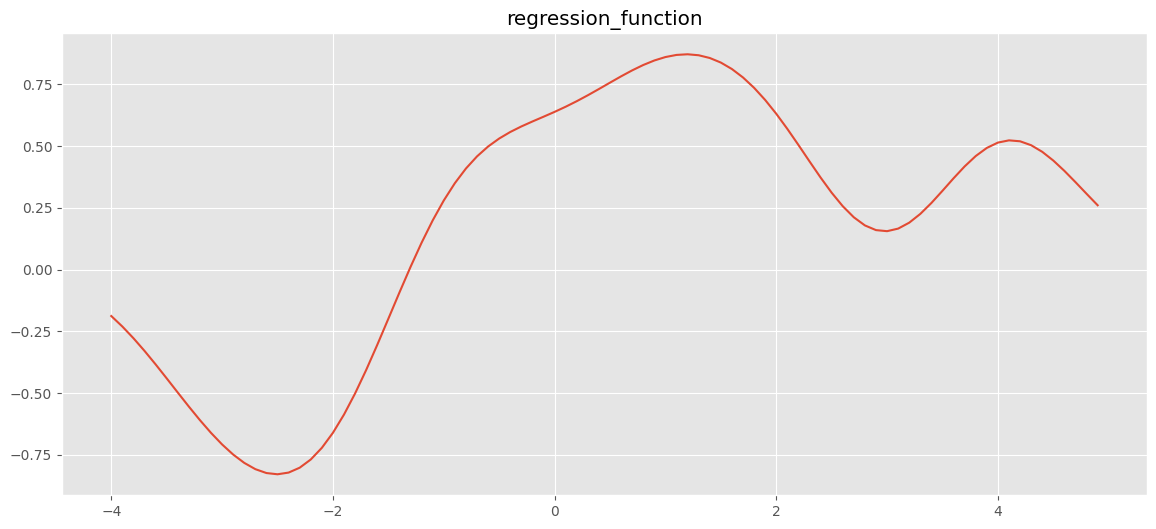

In [41]:
fig , ax = plt.subplots(figsize=(14, 6))

ax.plot(x , y , label = "regression_function")
ax.set_title("regression_function")

## 図3.4の実装
ガウス過程の概念図を実装します．

ただし，今回カーネルは以下のように定義します．
$$
k(x , x^{'}) = \theta_1 \exp{\left( - \frac{(x - x^{'})^2}{\theta_2} \right)} + \theta_3 \delta(x , x^{'})
$$

In [42]:
Theta_1 , Theta_2 , Theta_3 = 10 , 1 , 0.1

In [43]:
# カーネル関数を定義
def kernel(x, x_prime, p, q, r):
    if x == x_prime:
        delta = 1
    else:
        delta = 0
    
    kernel =  p*np.exp(-1 * (x - x_prime)**2 / q) + (r * delta) 
    return kernel

In [44]:
# カーネル計算を実行する関数
def compute_kernel(X , Theta_1 , Theta_2 , Theta_3):
    inputdata_length = len(X)
    K = np.zeros((inputdata_length, inputdata_length)) # 2次元配列
    for x in range(inputdata_length):
        for x_prime in range(inputdata_length):
            K[x, x_prime] = kernel(X[x], X[x_prime], Theta_1, Theta_2, Theta_3)
    return K

In [45]:
kai = np.arange(-4 , 5 , 0.1 )

In [46]:
K = compute_kernel(kai , Theta_1 , Theta_2 , Theta_3)

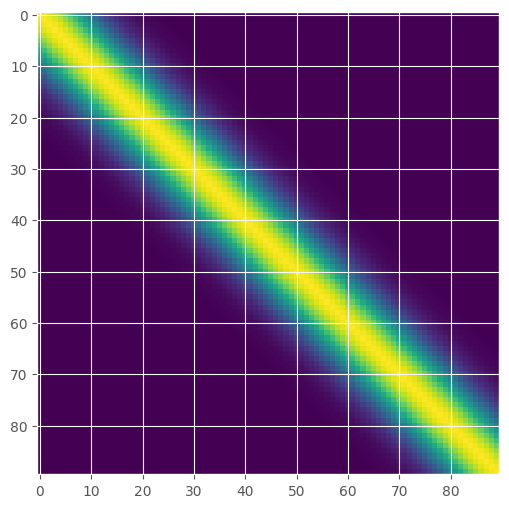

In [47]:
fig, ax = plt.subplots(figsize=(6, 6) )
im = ax.imshow(K)
plt.show()

# 図3.11の実装

先程定義したカーネルに対して図3.11のようなサンプルを生成します．

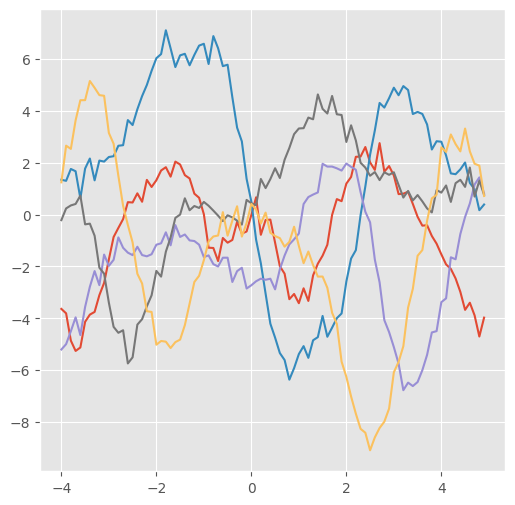

In [48]:
mu = 0 * kai
y = np.random.multivariate_normal(mu, K , 5)

fig, ax = plt.subplots(figsize=(6, 6) )
ax.plot(kai, y.T)
plt.show()

### 線形カーネル
$$
k(x , x^{'}) = \theta_1 x x^{'}
$$

In [49]:
# カーネル関数を定義
def kernel(x, x_prime, p):
    return p * np.dot(x, x_prime)

In [50]:
# カーネル計算を実行する関数
def compute_kernel(X , Theta_1):
    inputdata_length = len(X)
    K = np.zeros((inputdata_length, inputdata_length)) # 2次元配列
    for x in range(inputdata_length):
        for x_prime in range(inputdata_length):
            K[x, x_prime] = kernel(X[x], X[x_prime], Theta_1)
    return K

In [51]:
kai = np.arange(-4 , 5 , 0.1 )

In [52]:
K = compute_kernel(kai , Theta_1)

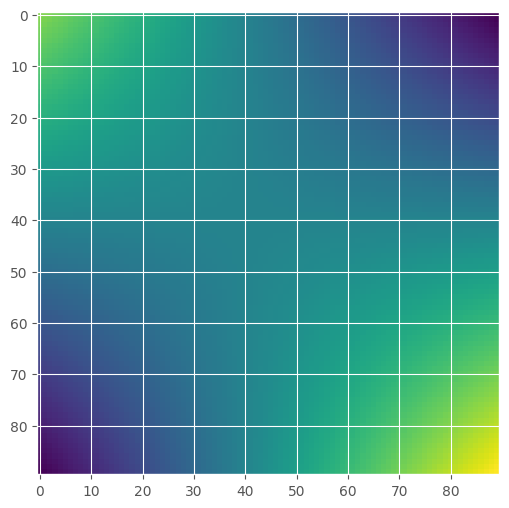

In [53]:
fig, ax = plt.subplots(figsize=(6, 6) )
im = ax.imshow(K)
plt.show()

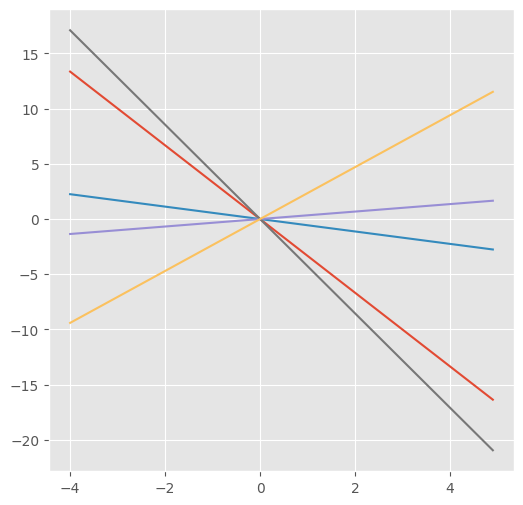

In [54]:
mu = 0 * kai
y = np.random.multivariate_normal(mu, K , 5)

fig, ax = plt.subplots(figsize=(6, 6) )
ax.plot(kai, y.T)
plt.show()

### 指数カーネル
$$
k(x , x^{'}) = \exp{\left( - \frac{|x - x^{'}|}{\theta} \right)}
$$

これはOUノイズに対応するもの．

#### ReMark:OUノイズ
OUノイズは，調和振動子ポテンシャルに従うブラウン運動である．

チャップマン・コロモゴロフ方程式(ガーディナー3.8.4節)
$$
\frac{\partial p(x , t)}{\partial t} =  \frac{\partial (k x p(x , t))}{\partial x} +\frac{D}{2} \frac{\partial^2 p(x , t)}{\partial x^2}
$$

確率微分方程式(ガーディナー4.5.4節)
$$
dx = -kx\ dt+ \sqrt{D}\ dW(t)
$$

積分方程式(ガーディナー4.5.4節)
$$
x(t) = x(0) \exp{\{-kt\}} + \sqrt{D} \int_0^t \exp{\{-k(t-s)\}} dW(s)
$$

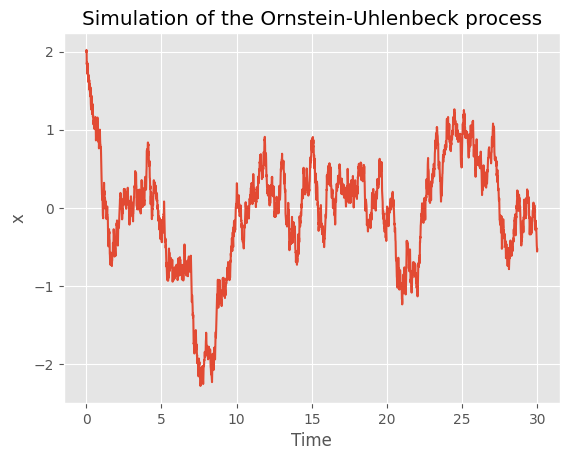

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータの設定
k = 1.0  # ボルツマン定数 k
D = 0.5  # 熱浴の温度定数 D
dt = 0.01  # 時間刻み幅
T = 30.0  # シミュレーション時間
N = int(T / dt)  # シミュレーションのステップ数

# 初期条件
x0 = 2.0  # 初期値 x(0)
t = np.zeros(N)  # 時間の配列
x = np.zeros(N)  # xの値の配列
x[0] = x0

# シミュレーション
for i in range(N-1):
    dW = np.random.normal(0, np.sqrt(dt))  # Wiener過程の増分
    x[i+1] = x[i] - k * x[i] * dt + np.sqrt(D) * dW
    t[i+1] = t[i] + dt

# グラフのプロット
plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('x')
plt.title('Simulation of the Ornstein-Uhlenbeck process')
plt.grid(True)
plt.show()


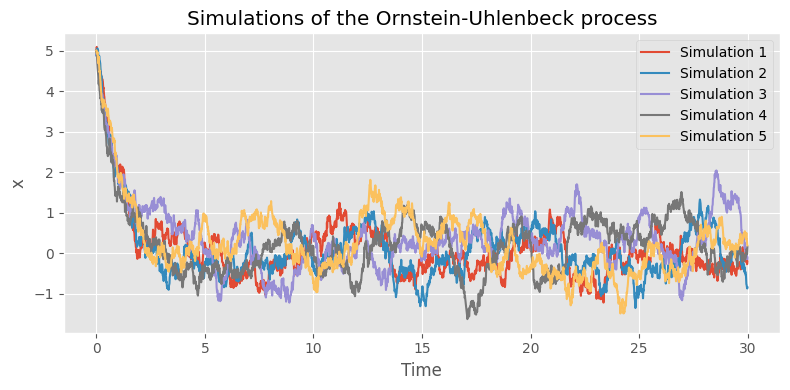

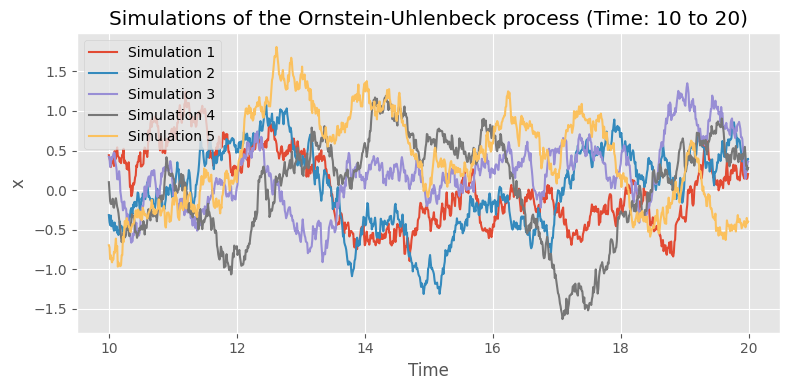

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータの設定
k = 1.0  # 定数 k
D = 0.5  # ノイズの強度 D
dt = 0.01  # 時間刻み幅
T = 30.0  # シミュレーション時間
N = int(T / dt)  # シミュレーションのステップ数

# 初期条件
x0 = 5.0  # 初期値 x(0)
t = np.zeros(N)  # 時間の配列

# シミュレーションの繰り返し
num_simulations = 5  # シミュレーション回数
simulations = np.zeros((num_simulations, N))  # シミュレーション結果の配列

for i in range(num_simulations):
    x = np.zeros(N)  # xの値の配列
    x[0] = x0
    
    for j in range(N-1):
        dW = np.random.normal(0, np.sqrt(dt))  # Wiener過程の増分
        x[j+1] = x[j] - k * x[j] * dt + np.sqrt(D) * dW
        t[j+1] = t[j] + dt
    
    simulations[i] = x

# 元の0から観測時間までのプロット
plt.figure(figsize=(8, 4))
for i in range(num_simulations):
    plt.plot(t, simulations[i], label=f'Simulation {i+1}')
plt.xlabel('Time')
plt.ylabel('x')
plt.title('Simulations of the Ornstein-Uhlenbeck process')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 時間範囲の指定
t_start = 10.0
t_end = 20.0
start_index = int(t_start / dt)
end_index = int(t_end / dt)

# 時間指定したプロット
plt.figure(figsize=(8, 4))
for i in range(num_simulations):
    plt.plot(t[start_index:end_index], simulations[i, start_index:end_index], label=f'Simulation {i+1}')
plt.xlabel('Time')
plt.ylabel('x')
plt.title('Simulations of the Ornstein-Uhlenbeck process (Time: 10 to 20)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


理論的な期待値
$$
E[x(t)] = x_0 \exp{\{-kt\}}
$$

理論的な分散
$$
Var[x(t)] = \frac{D}{2k} (1 - \exp{\{-2kt\}})
$$

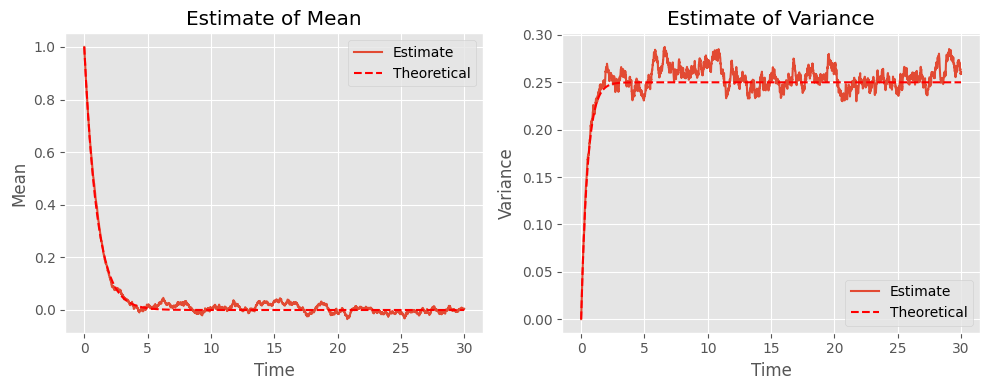

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータの設定
k = 1.0  # ボルツマン定数 k
D = 0.5  # 熱浴の温度定数 D
dt = 0.01  # 時間刻み幅
T = 30.0  # シミュレーション時間
N = int(T / dt)  # シミュレーションのステップ数

# 初期条件
x0 = 1.0  # 初期値 x(0)
t = np.zeros(N)  # 時間の配列

# シミュレーションの繰り返し
num_simulations = 1000  # シミュレーション回数
simulations = np.zeros((num_simulations, N))  # シミュレーション結果の配列

for i in range(num_simulations):
    x = np.zeros(N)  # xの値の配列
    x[0] = x0
    
    for j in range(N-1):
        dW = np.random.normal(0, np.sqrt(dt))  # Wiener過程の増分
        x[j+1] = x[j] - k * x[j] * dt + np.sqrt(D) * dW
        t[j+1] = t[j] + dt
    
    simulations[i] = x

# 期待値と分散の推定値の計算
mean_estimates = np.mean(simulations, axis=0)
variance_estimates = np.var(simulations, axis=0)

# 理論的な期待値と分散の計算
x_theoretical = x0 * np.exp(-k * t)
mean_theoretical = x0 * np.exp(-k * t)
variance_theoretical = (D / (2 * k)) * (1 - np.exp(-2 * k * t))

# グラフのプロット
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(t, mean_estimates, label='Estimate')
plt.plot(t, mean_theoretical, 'r--', label='Theoretical')
plt.xlabel('Time')
plt.ylabel('Mean')
plt.title('Estimate of Mean')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, variance_estimates, label='Estimate')
plt.plot(t, variance_theoretical, 'r--', label='Theoretical')
plt.xlabel('Time')
plt.ylabel('Variance')
plt.title('Estimate of Variance')
plt.legend()

plt.tight_layout()
plt.show()

#### OUノイズの定常状態
OUノイズの定常分布は，以下のようになる．
$$
p_s(x) = \sqrt{ \frac{k}{\pi D} } \exp{\left( - \frac{ k x^2}{D} \right)}
$$

また，定常自己相関関数は以下のようになる．
$$
C(\tau) = \frac{D}{2k} \exp{\{-k|\tau|\}}
$$

この自己相関関数が，指数カーネルと一致します．

Remark:指数カーネル
$$
k(x , x^{'}) = \exp{\left( - \frac{|x - x^{'}|}{\theta} \right)}
$$

話は指数カーネルに戻ります．

In [71]:
# カーネル関数を定義
def kernel(x, x_prime, p):
    return np.exp(-1 * np.abs(x - x_prime) / p)

In [72]:
# カーネル計算を実行する関数
def compute_kernel(X , Theta_1):
    inputdata_length = len(X)
    K = np.zeros((inputdata_length, inputdata_length)) # 2次元配列
    for x in range(inputdata_length):
        for x_prime in range(inputdata_length):
            K[x, x_prime] = kernel(X[x], X[x_prime], Theta_1)
    return K

In [73]:
kai = np.arange(0 , 10 , 0.01 )

In [74]:
K = compute_kernel(kai , 1)

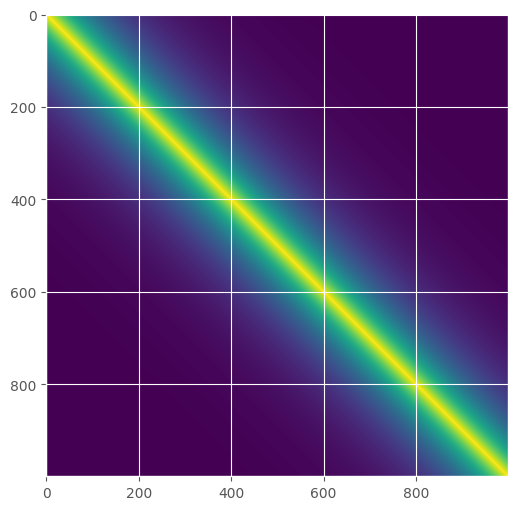

In [75]:
fig, ax = plt.subplots(figsize=(6, 6) )
im = ax.imshow(K)
plt.show()

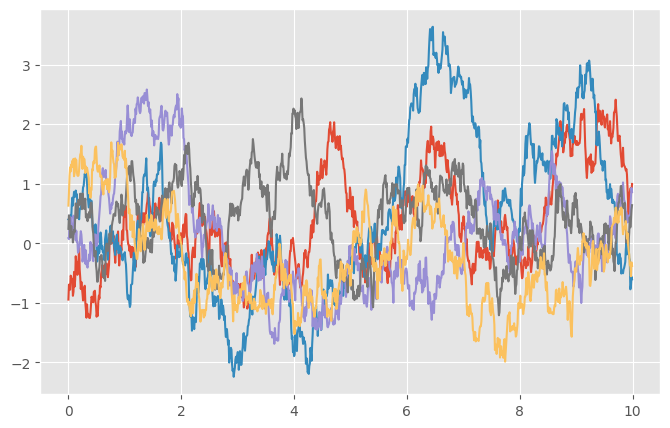

In [76]:
mu = 0 * kai
y = np.random.multivariate_normal(mu, K , 5)

fig, ax = plt.subplots(figsize=(8, 5) )
ax.plot(kai, y.T)
plt.show()

### 周期カーネル
$$
k(x , x^{'}) = \exp{\left( \theta_1 \cos(|x-x^{\prime}| / \theta_2)\right)}
$$

In [78]:
# カーネル関数を定義
def kernel(x, x_prime, p):
    return np.exp(p * np.cos(x - x_prime) / p)

In [79]:
# カーネル計算を実行する関数
def compute_kernel(X , Theta_1):
    inputdata_length = len(X)
    K = np.zeros((inputdata_length, inputdata_length)) # 2次元配列
    for x in range(inputdata_length):
        for x_prime in range(inputdata_length):
            K[x, x_prime] = kernel(X[x], X[x_prime], Theta_1)
    return K

In [80]:
kai = np.arange(-20 , 20 , 0.1 )

In [81]:
K = compute_kernel(kai , Theta_1)

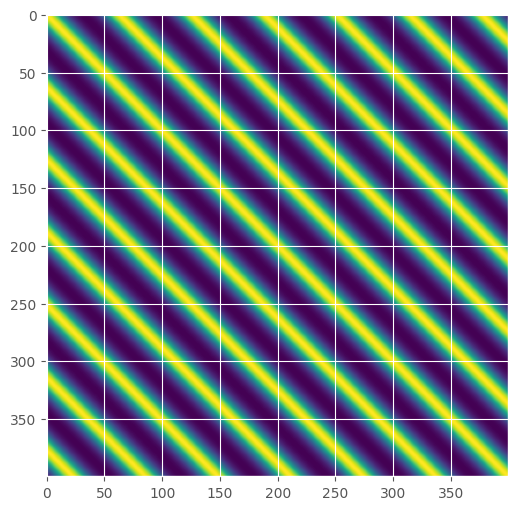

In [82]:
fig, ax = plt.subplots(figsize=(6, 6) )
im = ax.imshow(K)
plt.show()

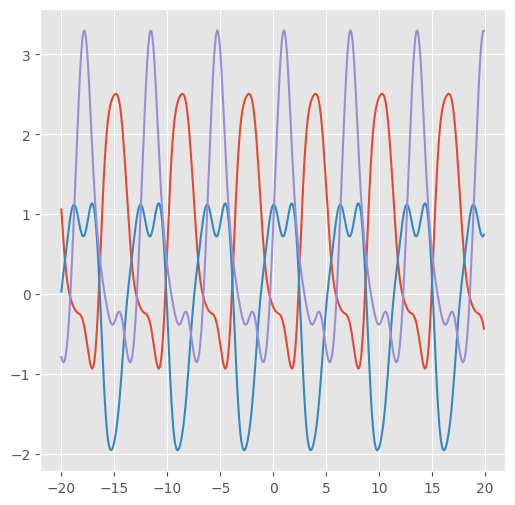

In [83]:
mu = 0 * kai
y = np.random.multivariate_normal(mu, K , 3)

fig, ax = plt.subplots(figsize=(6, 6) )
ax.plot(kai, y.T)
plt.show()